# MBTI Inferential Statistics
The main goal of this analysis is to look for distinctions between mbti categories using regular data visualization before beginning vectorization of the data for bag of words analysis. Exploring the dataset with some visualization might give us some ideas of avenues to explore for further analysis before initiating further natural language processing. This time I'll explore the text by axis instead of by personality class

### 1. Import necessary libraries and load/preview data set
There was a weird error with the encoding, resulting in an odd extra column

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
#read in mbti_cleaned.csv and drop 'Unnamed: 0' column
df = pd.read_csv('mbti_cleaned_unsplit1.csv', encoding = "ISO-8859-1")
df = df.drop('Unnamed: 0', axis=1)
df.head()

,type,posts,clean_posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,enfp intj moments sportscenter top ten plays p...
1,ENTP,'I'm finding the lack of me in these posts ver...,im finding lack posts alarming sex boring posi...
2,INTP,'Good one _____ https://www.youtube.com/wat...,good one course say know blessing curse absolu...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",dear intp enjoyed conversation day esoteric ga...
4,ENTJ,'You're fired.|||That's another silly misconce...,youre fired another silly misconception approa...


For a more in-depth look, call ```df.info()```

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 3 columns):
type           8675 non-null object
posts          8675 non-null object
clean_posts    8674 non-null object
dtypes: object(3)
memory usage: 203.4+ KB


In [16]:
#select only entries with no null values
df = df[pd.notnull(df['clean_posts'])]
df = df[pd.notnull(df['posts'])]

In [17]:
df['IE'] = [entry[0] for entry in df.type]
df['NS'] = [entry[1] for entry in df.type]
df['TF'] = [entry[2] for entry in df.type]
df['JP'] = [entry[3] for entry in df.type]

In [18]:
axes = (('Extrovert-Introvert', df['IE']), ('Intuition-Sensing', df['NS']),
        ('Feeling-Thinking', df['TF']), ('Judging-Percieving',df['JP']))

### 2. Data Distribution
count the number of entries per axis categories.

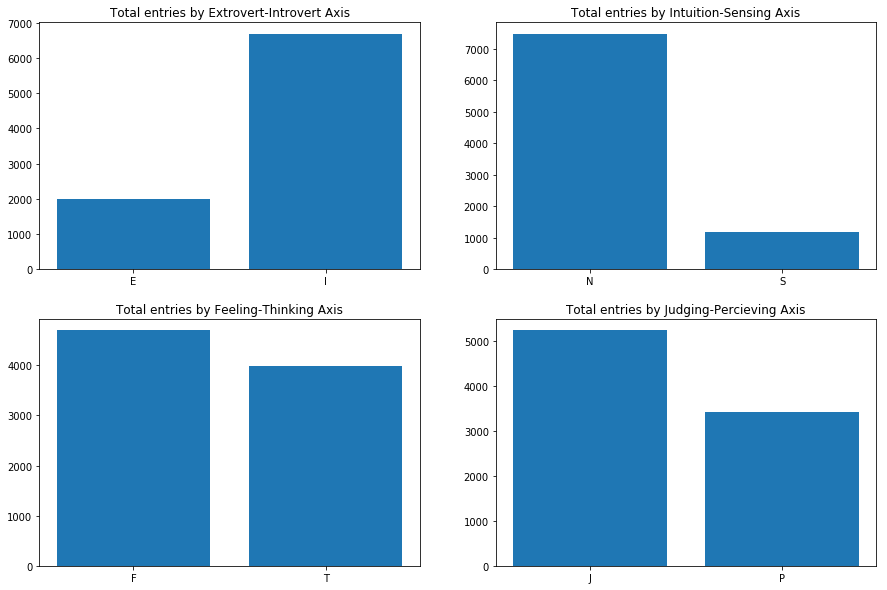

In [19]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
plots = [(0,0), (0,1), (1,0), (1,1)]
z = 0

for x, y in axes:
    ax[plots[z]].set_title('Total entries by {} Axis'.format(x))
    ax[plots[z]].bar(y.unique(), y.value_counts())
    z += 1


There is a skewed representation for the classes within each axis. Of the 4, the F-T axis was closest to being balanced.

### 3. Are there differences in mean word count per mbti type?
checking mean word count per entry grouped by mbti axis might show distinct differences in lengths of comments by personality class within each axis. First add new columns with word counts for every cleaned entry.

In [20]:
#using lambda functions, create new columns with counts of cleand and uncleaned entries 
df['words_per_comment_unclean'] = df['posts'].apply(lambda x: len(x.split()))
df['words_per_comment_clean'] = df['clean_posts'].apply(lambda x: len(x.split()))

mean word count by Extrovert-Introvert Axis: IE
E    605.299150
I    602.305618
Name: words_per_comment_clean, dtype: float64
mean word count by Intuition-Sensing Axis: NS
N    606.480005
S    581.229741
Name: words_per_comment_clean, dtype: float64
mean word count by Feeling-Thinking Axis: TF
F    612.268059
T    592.064557
Name: words_per_comment_clean, dtype: float64
mean word count by Judging-Percieving Axis: JP
J    608.156086
P    599.613550
Name: words_per_comment_clean, dtype: float64


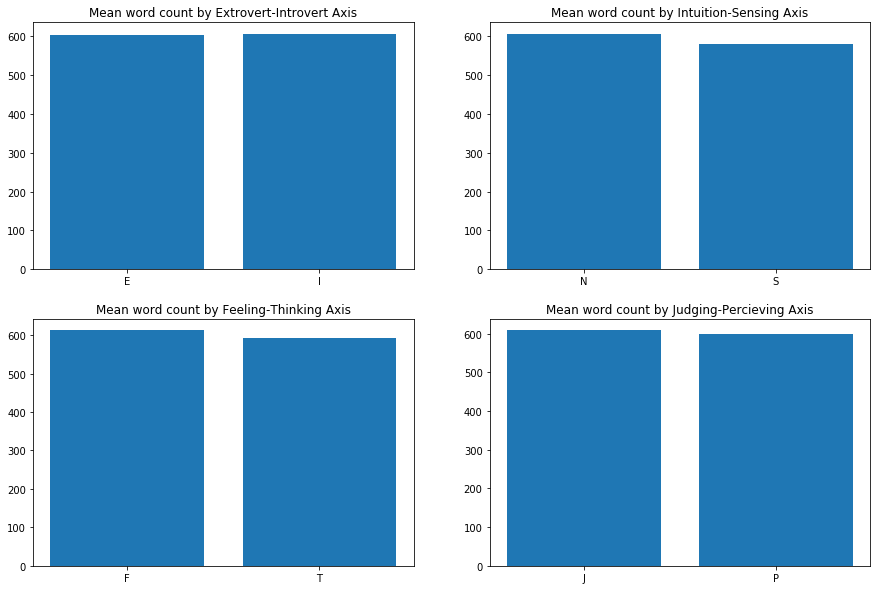

In [21]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
plots = [(0,0), (0,1), (1,0), (1,1)]
z = 0

for x, y in axes:
    ax[plots[z]].set_title('Mean word count by {} Axis'.format(x))
    ax[plots[z]].bar(y.unique(),df['words_per_comment_clean'].groupby(y).mean())
    z += 1
    print('mean word count by {} Axis: {}'.format(x
        ,df['words_per_comment_clean'].groupby(y).mean()))

Looking at the graphs it is pretty clear that any differences in mean word count within an axis are going to be fairly marginal and likely not useful.

### 5. Extracting text character distributions.
If you recall, looking at the original data there were many http links within the entries. Is it possibly that http links might be more represented in certain categories? How about for questions marks and exclamation points?

First check for counts of 'http' per entry grouped by personality type.

In [23]:
#create seperate columns with counts of 'http', '?', and '!'.
df['http_per_comment'] = df['posts'].apply(lambda x: x.count('http'))
df['qm_per_comment'] = df['posts'].apply(lambda x: x.count('?'))
df['ex_per_comment'] = df['posts'].apply(lambda x: x.count('!'))

mean number of links by Extrovert-Introvert Axis: IE
E    4.428160
I    6.124418
Name: http_per_comment, dtype: float64
mean number of links by Intuition-Sensing Axis: NS
N    5.614730
S    6.795637
Name: http_per_comment, dtype: float64
mean number of links by Feeling-Thinking Axis: TF
F    5.841749
T    5.734214
Name: http_per_comment, dtype: float64
mean number of links by Judging-Percieving Axis: JP
J    5.799008
P    5.787485
Name: http_per_comment, dtype: float64


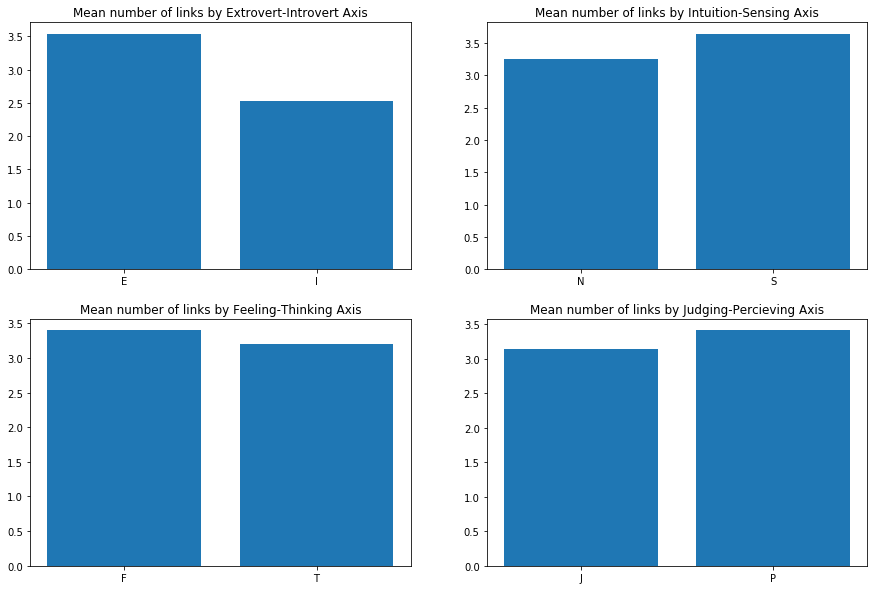

In [24]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
plots = [(0,0), (0,1), (1,0), (1,1)]
z = 0

for x, y in axes:
    ax[plots[z]].set_title('Mean number of links by {} Axis'.format(x))
    ax[plots[z]].bar(y.unique(),df['http_per_comment'].groupby(y).mean())
    z += 1
    print('mean number of links by {} Axis: {}'.format(x
        ,df['http_per_comment'].groupby(y).std()))

The mean number of http links per personality class in each axis was also indistinct for all intents and purposes. The most distinct axis was E - I and was only different by a margin of 1, so naturally this metric as a feature would not be very useful for classification.

Next check the mean number of question marks per entry grouped by mbti axis. Perhaps one mbti category asks more questions?

mean number of question marks by Extrovert-Introvert Axis: IE
E    9.238825
I    9.018355
Name: qm_per_comment, dtype: float64
mean number of question marks by Intuition-Sensing Axis: NS
N    9.162182
S    8.500151
Name: qm_per_comment, dtype: float64
mean number of question marks by Feeling-Thinking Axis: TF
F    9.189153
T    8.924544
Name: qm_per_comment, dtype: float64
mean number of question marks by Judging-Percieving Axis: JP
J    8.971110
P    9.140128
Name: qm_per_comment, dtype: float64


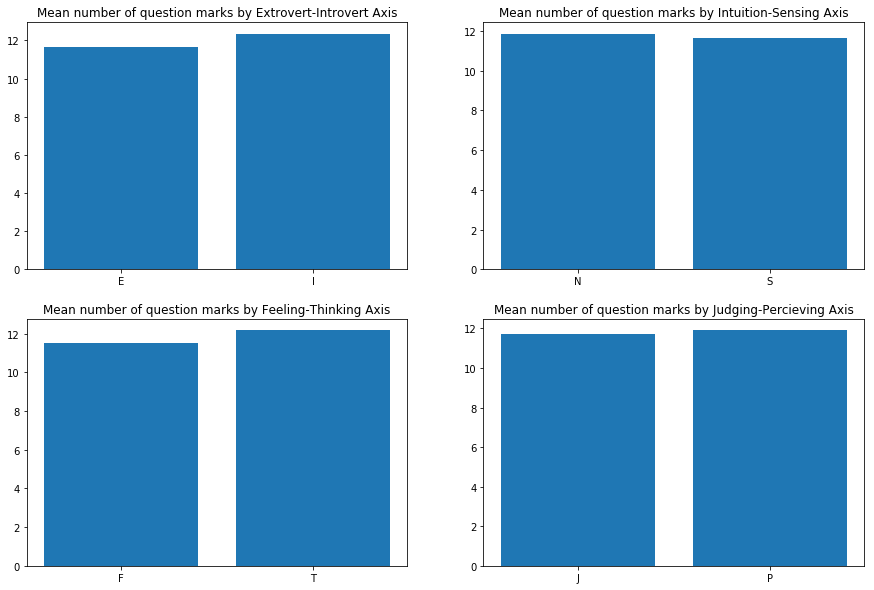

In [25]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
plots = [(0,0), (0,1), (1,0), (1,1)]
z = 0

for x, y in axes:
    ax[plots[z]].set_title('Mean number of question marks by {} Axis'.format(x))
    ax[plots[z]].bar(y.unique(),df['qm_per_comment'].groupby(y).mean())
    z += 1
    print('mean number of question marks by {} Axis: {}'.format(x
        ,df['qm_per_comment'].groupby(y).std()))

Again, the differnces are too marginal to be useful.

Let us now investigate exclamation points.

mean number of exclamation points by Extrovert-Introvert Axis: IE
E    15.398603
I    10.035651
Name: ex_per_comment, dtype: float64
mean number of exclamation points by Intuition-Sensing Axis: NS
N    11.644153
S    11.404648
Name: ex_per_comment, dtype: float64
mean number of exclamation points by Feeling-Thinking Axis: TF
F    13.398917
T     8.343634
Name: ex_per_comment, dtype: float64
mean number of exclamation points by Judging-Percieving Axis: JP
J    10.682357
P    12.176910
Name: ex_per_comment, dtype: float64


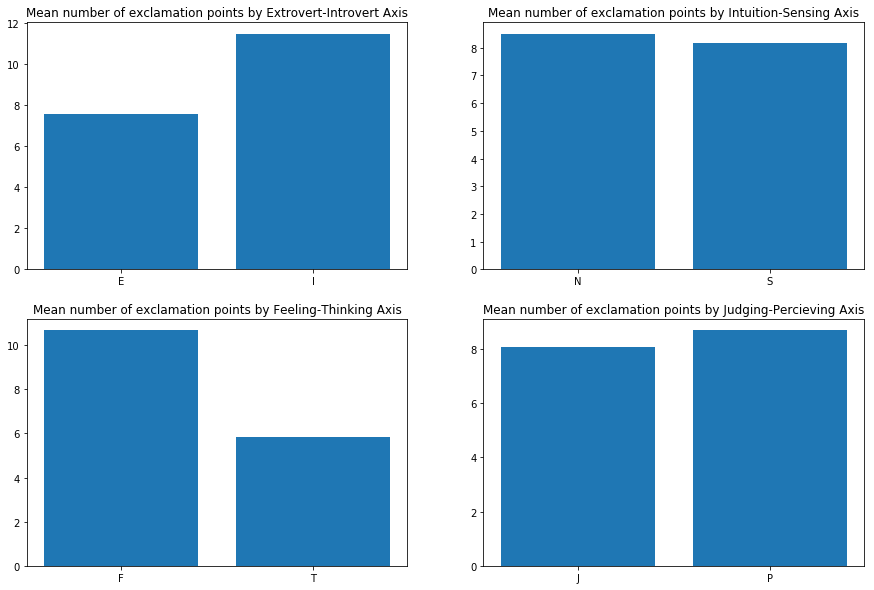

In [28]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
plots = [(0,0), (0,1), (1,0), (1,1)]
z = 0

for x, y in axes:
    ax[plots[z]].set_title('Mean number of exclamation points by {} Axis'.format(x))
    ax[plots[z]].bar(y.unique(),df['ex_per_comment'].groupby(y).mean())
    z += 1
    print('mean number of exclamation points by {} Axis: {}'.format(x
        ,df['ex_per_comment'].groupby(y).std()))

Of all three comparisons, this chart has the largest range of mean exclamation points per class within axis in two axes. The E-I difference could be due to skewed entry counts, but the F-T axis was the most balanced of all the axes in entry count. The higher number of average number of exclamation points for Feeling reinforces the idea that Feeling people are more empathetic than the detached Thinking class.